# CONTENTS
1 Importing libraries
2 Importing data
3 busiest days and hours of the day
4 price range
5 Exporting data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'D:\DATA ANALYSIS\Achievement 4 project 29-04-2025\03 Scripts\Prepared Folder\df_ords_large.pkl'

In [3]:
path

'D:\\DATA ANALYSIS\\Achievement 4 project 29-04-2025\\03 Scripts\\Prepared Folder\\df_ords_large.pkl'

In [4]:
df_ords = pd.read_pickle(path)

In [5]:
df_ords_2 = df_ords.drop(columns = ['first name', 'surname'])   # dropping columns PII data protection

In [15]:
df_ords_2.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,True,day_of_week
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Monday
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
2,2,2,473747,1,3,3,12,21.0,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday
4,4,4,431534,1,5,4,15,28.0,196,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday


# busiest days and hours of the day

In [6]:
#defining a function

day_of_week = []
for value in df_ords_2['orders_day_of_week']:
    if value == 0:
        day_of_week.append('Saturday')
    elif value == 1:
        day_of_week.append('Sunday')
    elif value == 2:
        day_of_week.append('Monday')
    elif value == 3:
        day_of_week.append('Tuesday')
    elif value == 4:
        day_of_week.append('Wednesday')
    elif value == 5:
        day_of_week.append('Thursday')
    elif value == 6:
        day_of_week.append('Friday')

df_ords_2['day_of_week'] = day_of_week

In [8]:
df_ords_2['day_of_week'].value_counts(dropna= False)

day_of_week
Saturday     6209632
Sunday       5665830
Friday       4500246
Monday       4217766
Thursday     4209449
Tuesday      3844096
Wednesday    3787193
Name: count, dtype: int64

Text(0, 0.5, 'Order Counts')

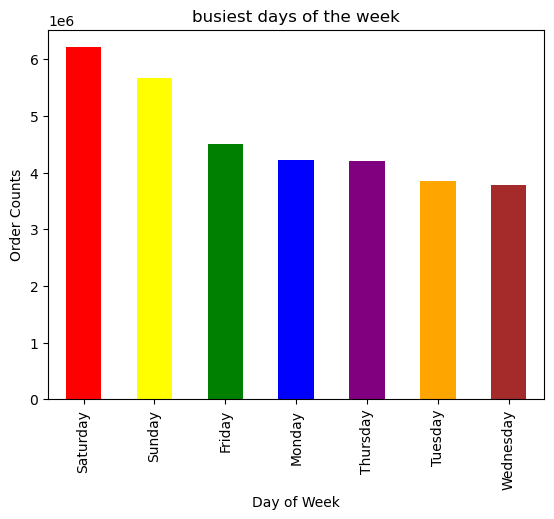

In [12]:
bar = df_ords_2['day_of_week'].value_counts().plot.bar(color = ['red', 'yellow', 'green', 'blue', 'purple', 'orange', 'brown'])

# Add title and labels
plt.title('busiest days of the week')
plt.xlabel('Day of Week')
plt.ylabel('Order Counts')

# This means the busiest days are saturday and sunday.

In [13]:
path = r'D:\DATA ANALYSIS\Achievement 4 project 29-04-2025\04 Analysis\Visualizations'

In [14]:
bar.figure.savefig(os.path.join(path, 'busiest_days.png'))  # exporting graph

In [23]:
# Define the function for the busiest hours
def get_busiest_hours(order_counts_dict, top_n=5):
    sorted_hours = sorted(order_counts_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_hours[:top_n]

In [24]:
order_counts = {
    10: 2764390, 11: 2738585, 14: 2691563, 15: 2664522, 13: 2663272,
    12: 2620800, 16: 2537469, 9: 2456661, 17: 2089452, 8: 1719952,
    18: 1637922, 19: 1259382, 20: 977017, 7: 891928, 21: 796362,
    22: 634737, 23: 402612, 6: 290770, 0: 218942, 1: 115786,
    5: 88057, 2: 69431, 4: 53283, 3: 51317
}

In [25]:
top_hours = get_busiest_hours(order_counts, top_n=5)

In [26]:
print("Top 5 busiest order hours:")
for hour, count in top_hours:
    print(f"{hour}:00 - {count} orders")


Top 5 busiest order hours:
10:00 - 2764390 orders
11:00 - 2738585 orders
14:00 - 2691563 orders
15:00 - 2664522 orders
13:00 - 2663272 orders


Text(0, 0.5, 'Order Counts')

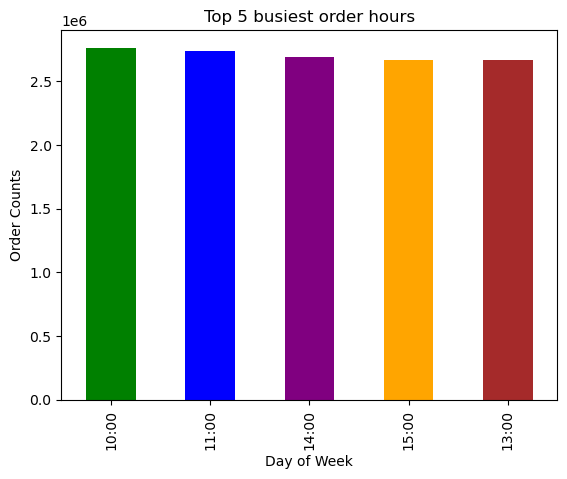

In [29]:
# Convert to a pandas Series for easy plotting
top_hours_series = pd.Series(
    data=[count for hour, count in top_hours],
    index=[f"{hour}:00" for hour, count in top_hours]
)

# Plot
colors = ['green', 'blue', 'purple', 'orange', 'brown']
ax = top_hours_series.plot.bar(color=colors)

# Add title and labels
plt.title('Top 5 busiest order hours')
plt.xlabel('Day of Week')
plt.ylabel('Order Counts')

In [30]:
ax.figure.savefig(os.path.join(path, 'busiest_hours.png'))  # exporting graph

# This means the busiest hours are 10 AM, 11 AM, 2 PM, 3 PM, and 1 PM.


In [32]:
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [33]:
df_ords_2 = df_ords_2[df_ords_2['department_id'] == 4].copy()           # defining a function

In [34]:
df_ords_2['price_range'] = df_ords_2.apply(price_label, axis=1)   #  Apply your price_label function row-wise

In [35]:
df_ords_2['price_range'].value_counts(dropna = False)          # checking the values in the new column.

price_range
Mid-range product    6781408
Low-range product    2697883
Name: count, dtype: int64

# The data shows that mid-range products are significantly more popular, with about 6.8 million orders compared to 2.7 million for low-range products. This suggests that customers tend to prefer mid-priced items, possibly due to perceived value or product availability. It may also indicate that your product mix or pricing strategy favors mid-range offerings.

Text(0.5, 1.0, 'price_range')

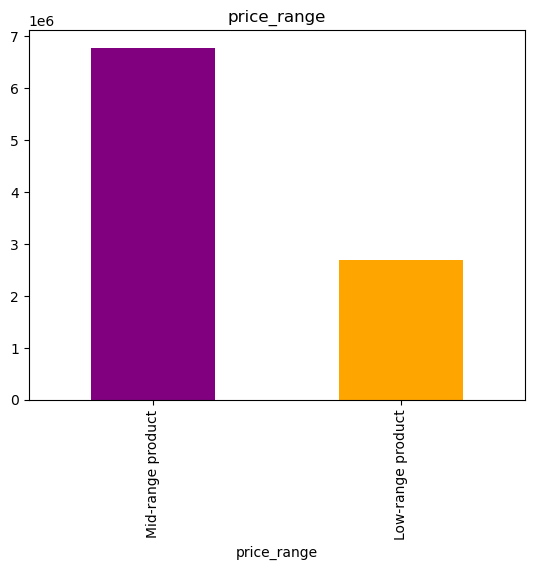

In [37]:
bar = df_ords_2['price_range'].value_counts().plot.bar(color = (['purple', 'orange', 'brown']))

# Add title and labels
plt.title('price_range')


In [38]:
bar.figure.savefig(os.path.join(path, 'price_range.png'))  # exporting graph

In [40]:
# exporting to pickle
df_ords.to_pickle(os.path.join(path, 'df_ords_2_b.pickle'))